In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import linear_model
from sklearn import tree
from sklearn import neighbors
from sklearn import naive_bayes
from sklearn import ensemble
from sklearn import cluster
from sklearn import mixture
from sklearn import metrics

import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', None)

In [9]:
data_raw = pd.read_csv('data/CC GENERAL.csv')
data_raw.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [10]:
data_raw.isna().sum().sum()

314

In [11]:
data_raw.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [12]:
data_raw['CREDIT_LIMIT'].fillna(data_raw['CREDIT_LIMIT'].mean(), inplace=True)
data_raw['MINIMUM_PAYMENTS'].fillna(data_raw['MINIMUM_PAYMENTS'].mean(), inplace=True)


In [13]:
data_raw['MINIMUM_PAYMENTS'].mean()

864.2065423050761

In [15]:
data_raw.drop(['CUST_ID'], axis=1, inplace=True)

In [16]:
scaler = preprocessing.StandardScaler()

X_norm = scaler.fit_transform(data_raw)
X_norm[0][0]

-0.7319893664465486

<function matplotlib.pyplot.show(close=None, block=None)>

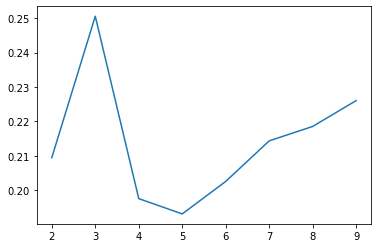

In [18]:
cluster_list = list()
score_list = list()
for K in range(2, 9+1):
    model = cluster.KMeans(n_clusters=K, random_state=42)
    model.fit(X_norm)
    score = metrics.silhouette_score(X_norm, model.labels_)
    cluster_list.append(K)
    score_list.append(score)

plt.plot(cluster_list, score_list)
plt.show()

In [19]:
model = cluster.KMeans(n_clusters=3, random_state=42)
model.fit(X_norm)
np.bincount(model.labels_)

array([6118, 1597, 1235])

In [24]:
model = cluster.DBSCAN()
model.fit(X_norm)
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(model.labels_)) - (1 if -1 in model.labels_ else 0)
n_clusters_

38

In [25]:
score_list = list()
for eps in np.arange(0.1,3,0.2):
    for min_samples in range(1,20,4):
        model = cluster.DBSCAN(eps=eps, min_samples=min_samples)
        model.fit(X_norm)
        score = metrics.silhouette_score(X_norm, model.labels_)
        score_list.append([eps, min_samples, score])

sorted(score_list, key=lambda x: x[2], reverse=True)[0:3]

[[0.1, 1, 0.016088101678116005],
 [0.1, 5, -0.37480763495802677],
 [0.1, 9, -0.25356488418531886],
 [0.1, 13, -0.2436145630317598],
 [0.1, 17, -0.2501812991771469],
 [0.30000000000000004, 1, 0.022678660017728346],
 [0.30000000000000004, 5, -0.42447460395317227],
 [0.30000000000000004, 9, -0.4042093963692077],
 [0.30000000000000004, 13, -0.3519837191686831],
 [0.30000000000000004, 17, -0.35259593550295876],
 [0.5000000000000001, 1, -0.14501241385518446],
 [0.5000000000000001, 5, -0.4437013266683457],
 [0.5000000000000001, 9, -0.31765746320613075],
 [0.5000000000000001, 13, -0.13380219141974145],
 [0.5000000000000001, 17, -0.18647706862226324],
 [0.7000000000000001, 1, -0.2612758090201566],
 [0.7000000000000001, 5, -0.43883698908601104],
 [0.7000000000000001, 9, -0.3260020902287138],
 [0.7000000000000001, 13, -0.270490209893498],
 [0.7000000000000001, 17, -0.2664710582213962],
 [0.9000000000000001, 1, -0.36335889649837005],
 [0.9000000000000001, 5, -0.35917534461115475],
 [0.900000000000

In [26]:
sorted(score_list, key=lambda x: x[2], reverse=True)[0:3]

[[2.900000000000001, 5, 0.6173453608696496],
 [2.900000000000001, 9, 0.603811143781068],
 [2.900000000000001, 13, 0.5953985556350827]]

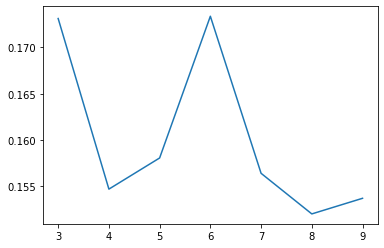

In [28]:
cluster_list = list()
score_list = list()
for K in range(3, 9+1):
    model = cluster.AgglomerativeClustering(n_clusters=K)
    model.fit(X_norm)
    score = metrics.silhouette_score(X_norm, model.labels_)
    cluster_list.append(K)
    score_list.append(score)

plt.plot(cluster_list, score_list)
plt.show()

In [29]:
score_list

[0.1731098007232828,
 0.1547093352037027,
 0.15806867978666445,
 0.17335577924064002,
 0.156415467090623,
 0.15203451293262077,
 0.15371895842035113]

In [34]:
model = cluster.AgglomerativeClustering(n_clusters=6)
model.fit(X_norm)
display(np.bincount(model.labels_))
np.unique(model.labels_)

array([3946, 2931,  864,  464,   23,  722])

array([0, 1, 2, 3, 4, 5])

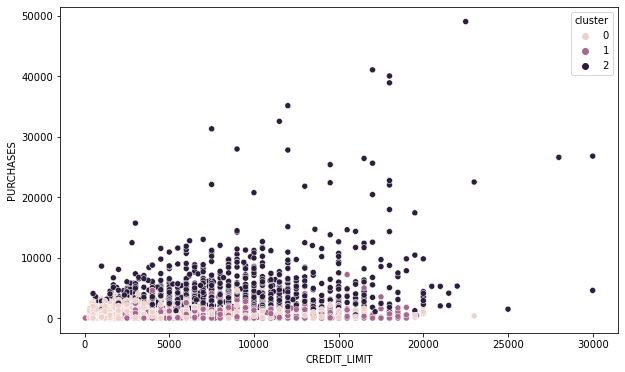

In [35]:
kmeans = cluster.KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_norm)
data_raw['cluster'] = kmeans.labels_
plt.figure(figsize=(10,6))
sns.scatterplot(data=data_raw, x='CREDIT_LIMIT', y='PURCHASES', hue='cluster')
plt.show()